In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# Загрузка данных
data = pd.read_excel("Ad_revenue.xlsx")

# Фильтрация данных для нулевого, первого, третьего дней и 30-го дня
day_0 = data[data['event_date'] == data['install_date']]
day_1 = data[data['event_date'] == (day_0['install_date'].iloc[0] + pd.Timedelta(days=1))]
day_3 = data[data['event_date'] == (day_0['install_date'].iloc[0] + pd.Timedelta(days=3))]
day_30 = data[data['event_date'] == (day_0['install_date'].iloc[0] + pd.Timedelta(days=30))]

# Вычисление суммы рекламного заработка для каждого дня
revenue_0 = day_0['event_revenue'].sum()
revenue_1 = day_1['event_revenue'].sum()
revenue_3 = day_3['event_revenue'].sum()
revenue_30 = day_30['event_revenue'].sum()

# Вычисление отношений
increase_1 = revenue_1 / revenue_0
increase_3 = revenue_3 / revenue_0
increase_30 = revenue_30 / revenue_0

print(f"Увеличение от нулевого дня до первого: {increase_1:.2f} раза")
print(f"Увеличение от нулевого дня до третьего: {increase_3:.2f} раза")
print(f"Увеличение от нулевого дня до 30-го дня: {increase_30:.2f} раза")


Увеличение от нулевого дня до первого: 0.09 раза
Увеличение от нулевого дня до третьего: 0.17 раза
Увеличение от нулевого дня до 30-го дня: 0.00 раза


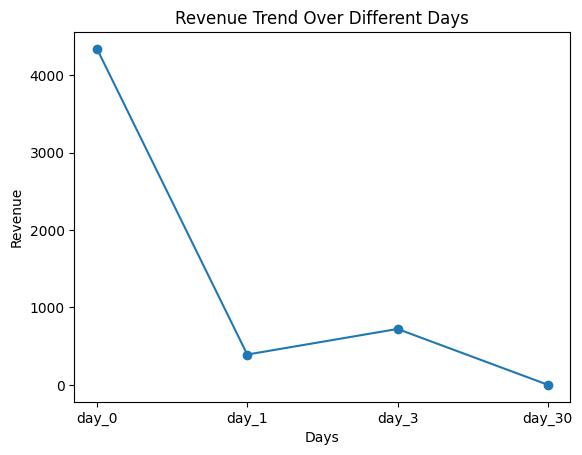

In [4]:
# Построение графиков
plt.plot(['day_0', 'day_1', 'day_3', 'day_30'], [revenue_0, revenue_1, revenue_3, revenue_30], marker='o')
plt.title('Revenue Trend Over Different Days')
plt.xlabel('Days')
plt.ylabel('Revenue')
plt.show()

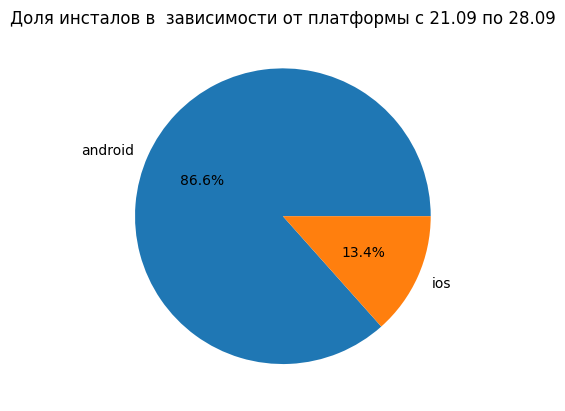

In [19]:
# Доля платформ
data2 = pd.read_excel("Ad_revenue.xlsx", sheet_name='installs data')
gr_data2 = data2.groupby(['platform'])[['installs']].agg(sum).reset_index()
gr_data2['Share'] = gr_data2['installs'] * 100 / sum(gr_data2['installs'])
gr_data2['Share'] = gr_data2['Share'].round(2)
plt.pie(gr_data2['Share'], labels=gr_data2['platform'], autopct='%1.1f%%')
plt.title("Доля инсталов в  зависимости от платформы")
plt.show()